In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import plotly.express as px

In [26]:
data = pd.read_csv('speaker_dialogues.csv')

In [27]:
data.info()

data['speaker'] = data['speaker'].replace({
    'SPEAKER_00': 'Pedro Vazquez',
    'SPEAKER_01': 'Sergio Gutierrez',
    'SPEAKER_02': 'Julieta Villalpando',
    'SPEAKER_03': 'Martin Mondragon'
})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   speaker  62 non-null     object 
 1   start    62 non-null     float64
 2   end      62 non-null     float64
 3   text     62 non-null     object 
dtypes: float64(2), object(2)
memory usage: 2.1+ KB


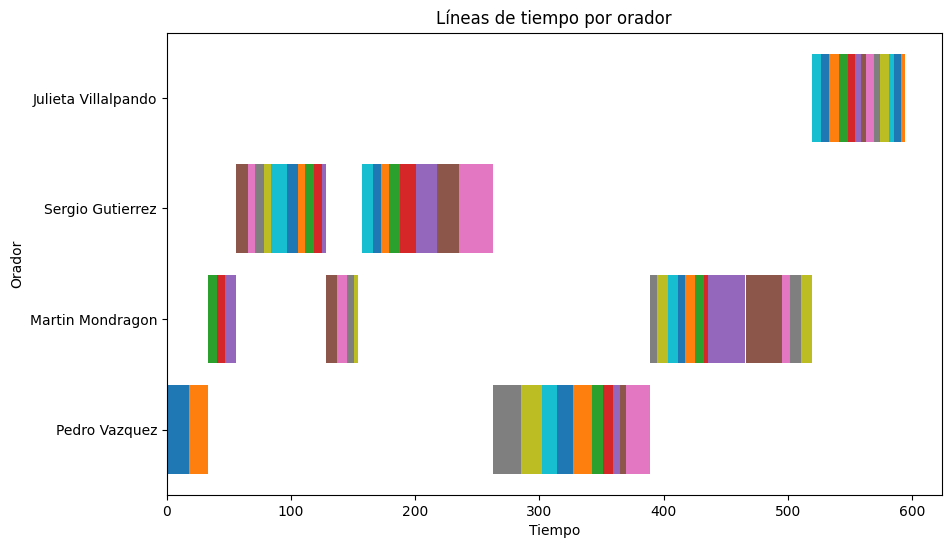

In [28]:
import matplotlib.pyplot as plt

# Crear figura
plt.figure(figsize=(10, 6))

# Dibujar las barras
for i, speaker in enumerate(data['speaker']):
    plt.barh(speaker, data['end'][i] - data['start'][i], left=data['start'][i])

plt.xlabel('Tiempo')
plt.ylabel('Orador')
plt.title('Líneas de tiempo por orador')
plt.show()


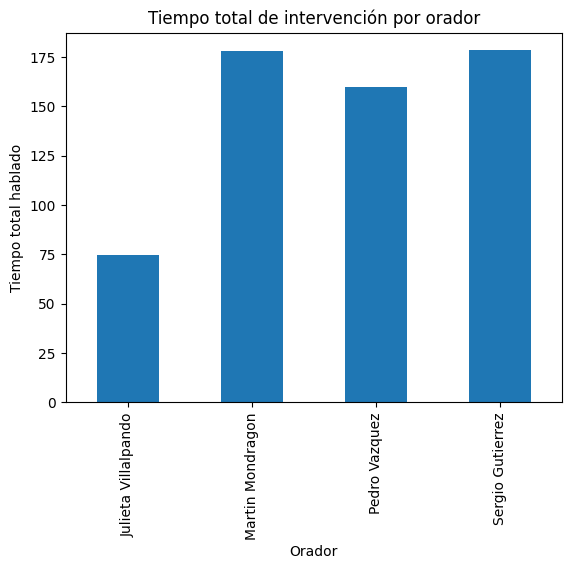

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data)
df['duration'] = df['end'] - df['start']

# Agrupar por orador y sumar las duraciones
grouped = df.groupby('speaker')['duration'].sum()

# Crear el gráfico
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Orador')
plt.ylabel('Tiempo total hablado')
plt.title('Tiempo total de intervención por orador')
plt.show()


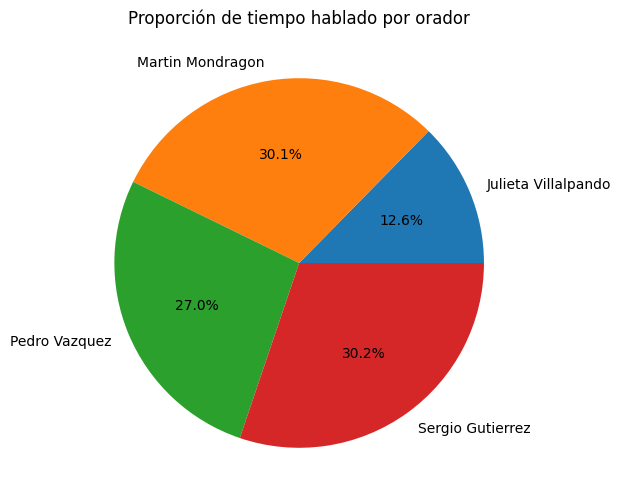

In [30]:
# Crear el gráfico de pie
grouped.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.ylabel('')
plt.title('Proporción de tiempo hablado por orador')
plt.show()


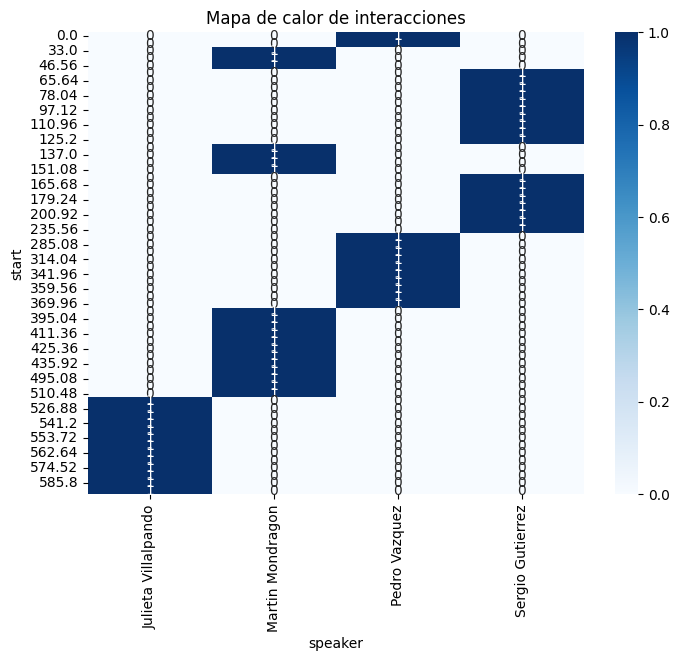

In [31]:
import seaborn as sns

# Crear matriz de interacción
interaction_matrix = pd.crosstab(df['start'], df['speaker'])

# Crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(interaction_matrix, cmap='Blues', annot=True)
plt.title('Mapa de calor de interacciones')
plt.show()


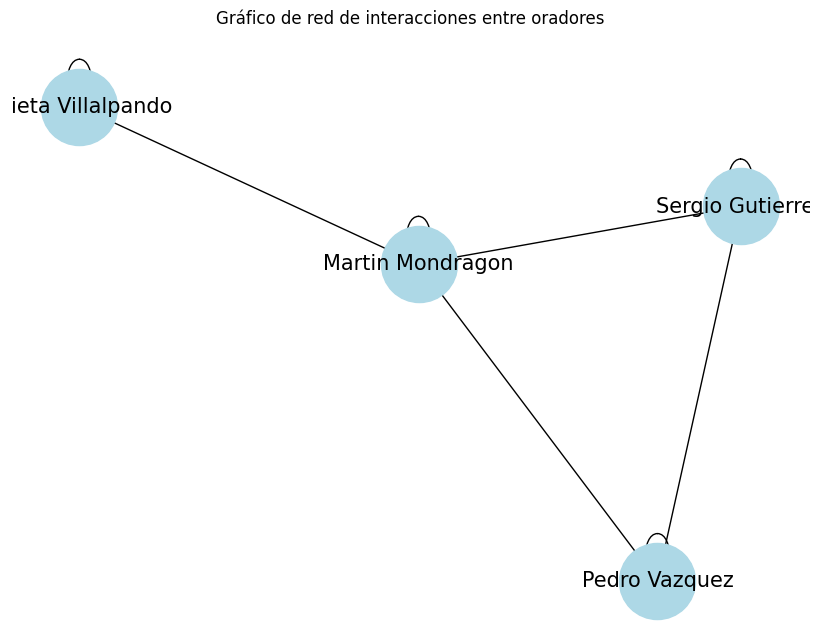

In [32]:
import networkx as nx

# Crear un grafo
G = nx.Graph()

# Agregar nodos (oradores)
G.add_nodes_from(df['speaker'].unique())

# Agregar aristas (interacciones entre oradores)
for i in range(1, len(df)):
    G.add_edge(df['speaker'][i-1], df['speaker'][i])

# Dibujar la red
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=3000, font_size=15, font_color='black')
plt.title('Gráfico de red de interacciones entre oradores')
plt.show()


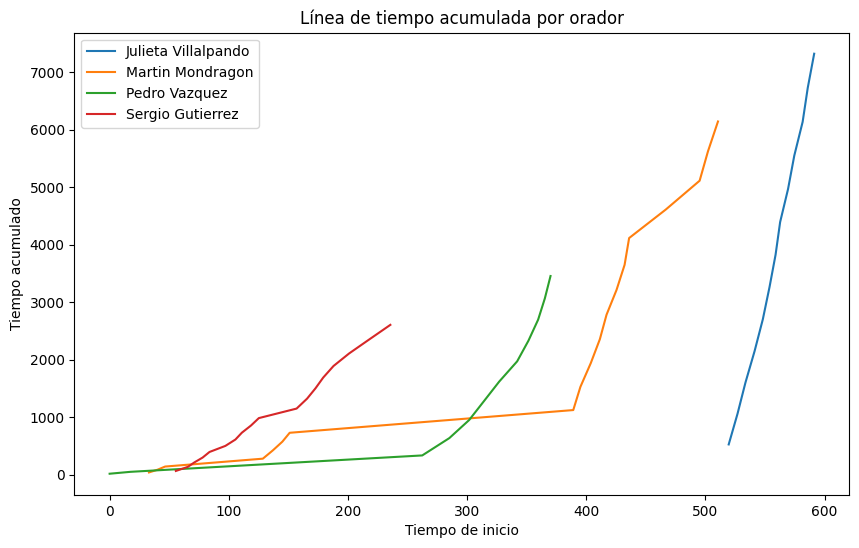

In [33]:
import numpy as np

# Crear una columna de tiempo acumulado para cada orador
df['cumulative_time'] = df.groupby('speaker')['end'].cumsum()

# Crear un gráfico de líneas
plt.figure(figsize=(10, 6))
for speaker, group in df.groupby('speaker'):
    plt.plot(group['start'], group['cumulative_time'], label=speaker)

plt.xlabel('Tiempo de inicio')
plt.ylabel('Tiempo acumulado')
plt.title('Línea de tiempo acumulada por orador')
plt.legend()
plt.show()


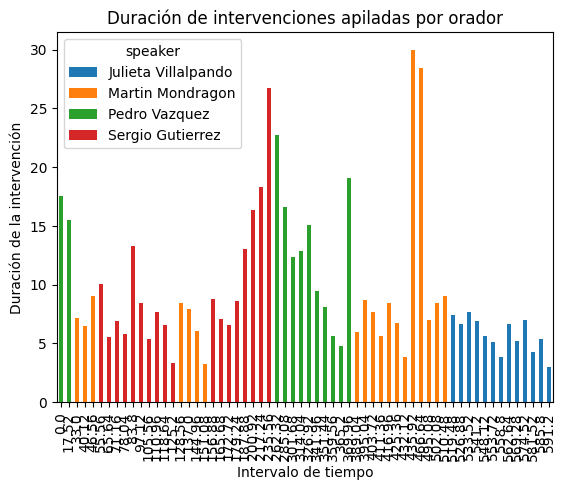

In [34]:
# Agrupar por orador y sumar las duraciones
grouped = df.groupby('speaker')['duration'].sum()

# Crear el gráfico de barras apiladas
df.pivot(index='start', columns='speaker', values='duration').plot(kind='bar', stacked=True)
plt.xlabel('Intervalo de tiempo')
plt.ylabel('Duración de la intervención')
plt.title('Duración de intervenciones apiladas por orador')
plt.show()
